In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal

# Step 1: Simulation of GMM

### Determine the parameter of the Gaussian distributions

In [2]:
#Number of samples
n_samples = 100

mu1, sig1 = -10, 50 # mean and variance
mu2, sig2 = 4, 1.8 # mean and variance

#generating random dataset for the two distribution
X1 = np.random.normal(mu1, np.sqrt(sig1), n_samples)
X2 = np.random.normal(mu2, np.sqrt(sig2), n_samples)

#Combining the two dataset
X = np.array(list(X1) + list(X2))
np.random.shuffle(X)
print("Dataset shape:", X.shape)

Dataset shape: (200,)


### Define the pdf of Gaussian Distributions

In [3]:
def pdf(data, mean: float, variance: float):
  # A normal continuous random variable.
  pdf_gauss1 = 1/(np.sqrt(2*np.pi*variance))
  pdf_gauss2 = np.exp(-(np.square(data - mean)/(2*variance)))
  return pdf_gauss1*pdf_gauss2

### Plot the Gaussian distributions

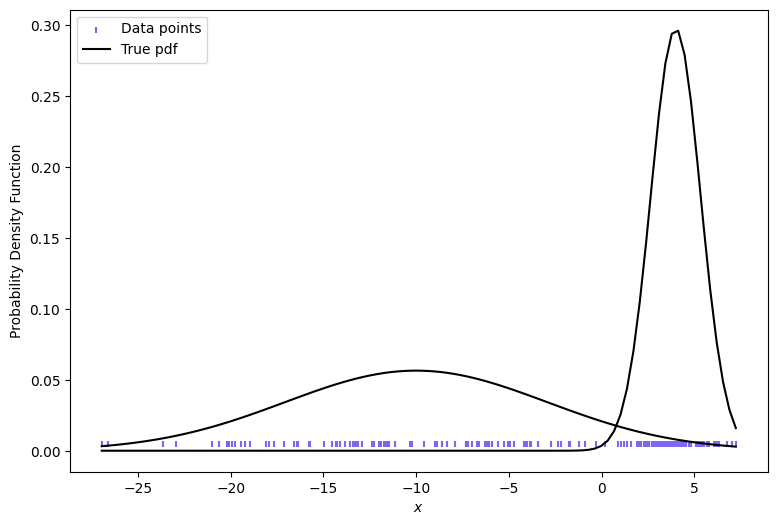

In [4]:
#Plot the data points on real axis
bin = np.linspace(np.min(X),np.max(X),100)

plt.figure(figsize=(9,6))
plt.xlabel("$x$")
plt.ylabel("Probability Density Function")
plt.scatter(X, [0.005] * len(X), color='mediumslateblue', s=15, marker="|", label="Data points")

#Plot the Gaussians
plt.plot(bin, pdf(bin, mu1, sig1), color='black', label="True pdf")
plt.plot(bin, pdf(bin, mu2, sig2), color='black')

plt.legend()
plt.show()

# Step 2: Estimating the parameters (knowing that the data come from 2 Gaussians)

### Define the number of Gaussian distributions (k=2) and initial parameters

In [5]:
#Number of Gaussian distributions
k = 2

#Setting initial parameters
weights = np.ones((k)) / k
means = np.random.choice(X, k)
variances = np.random.random_sample(size=k)
print(means, variances)

X = np.array(X)
print(X.shape)

[  4.07907162 -13.28446626] [0.97518178 0.15216571]
(200,)


### Run GMM and plot the EM algorithm (each iteration)

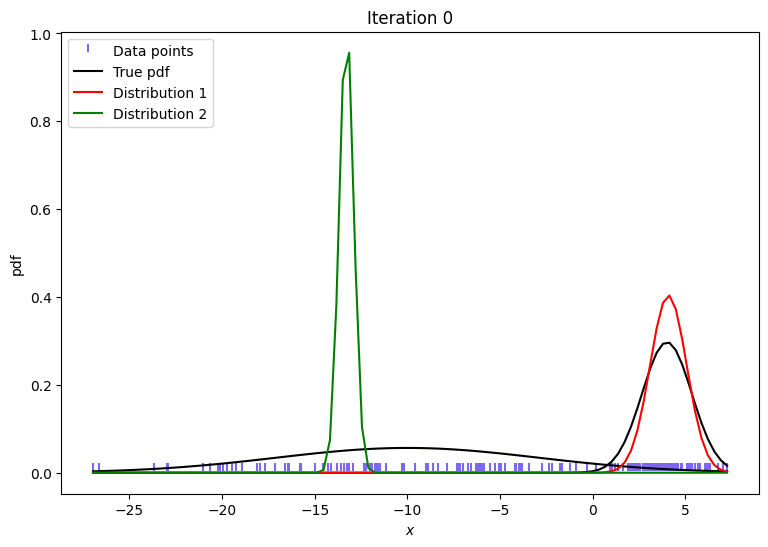

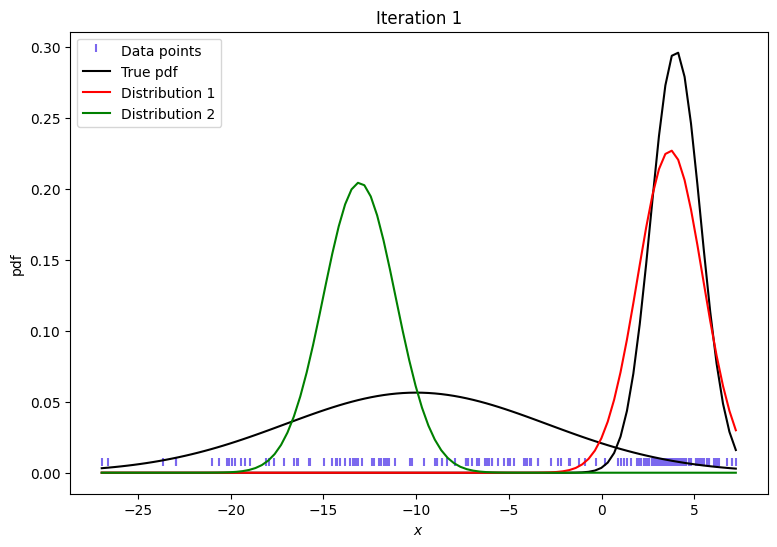

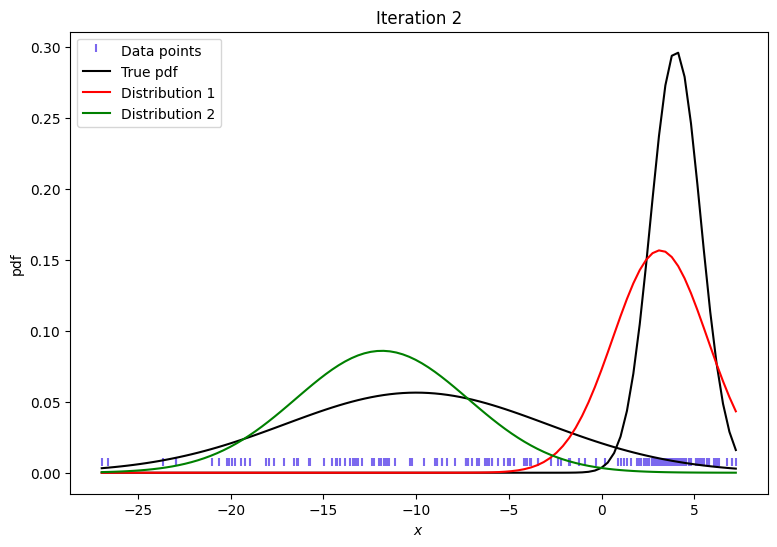

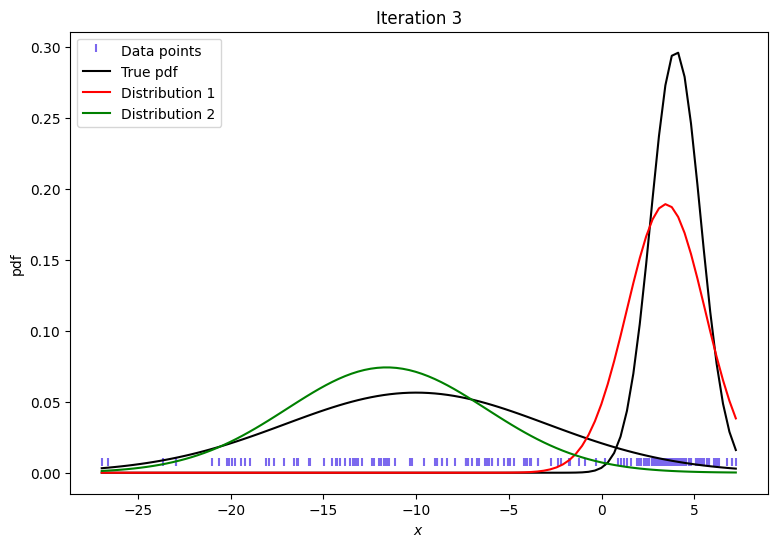

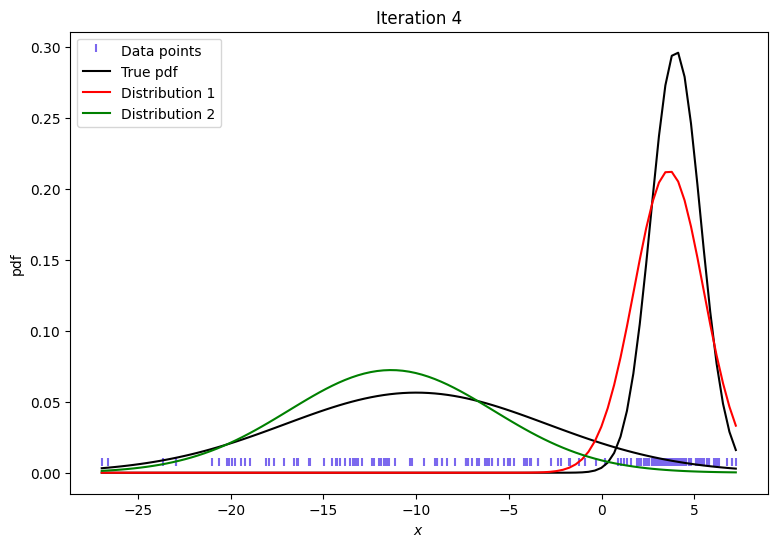

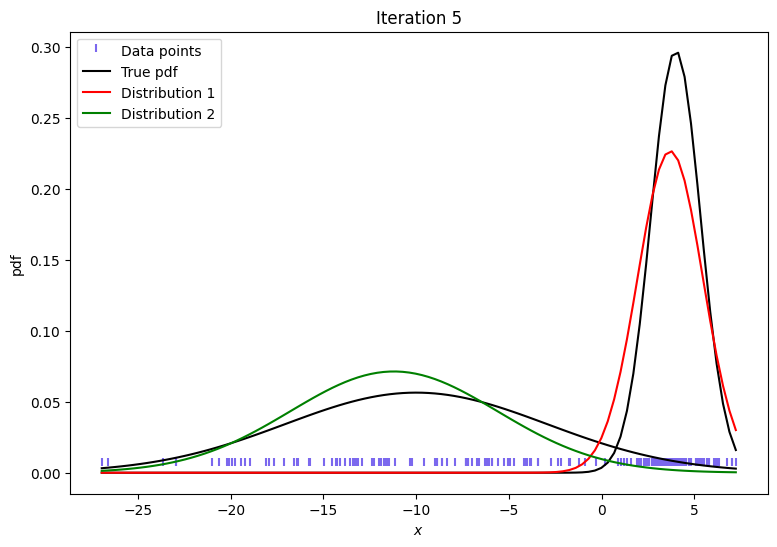

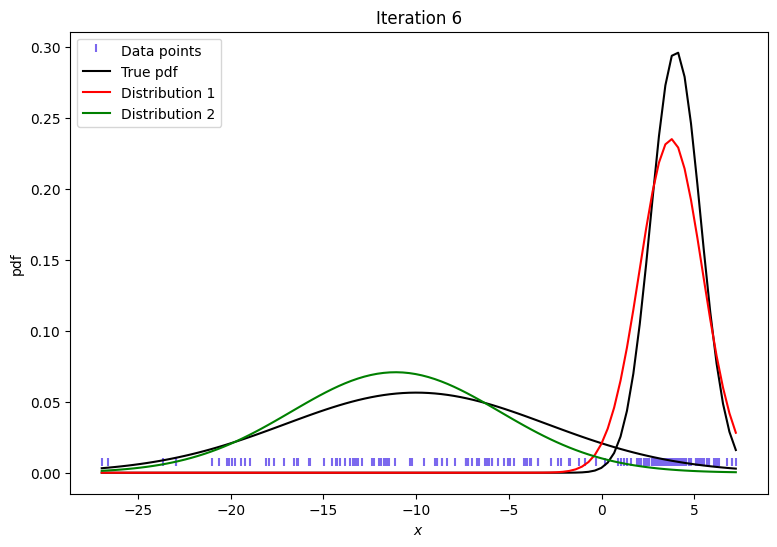

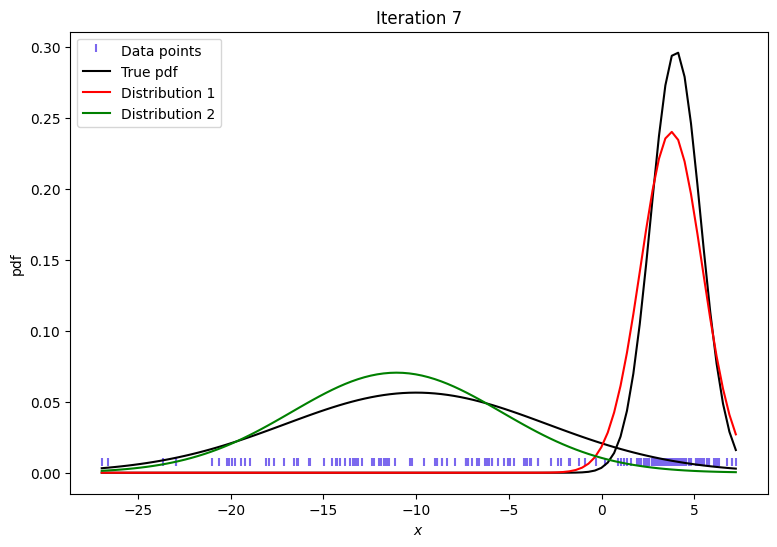

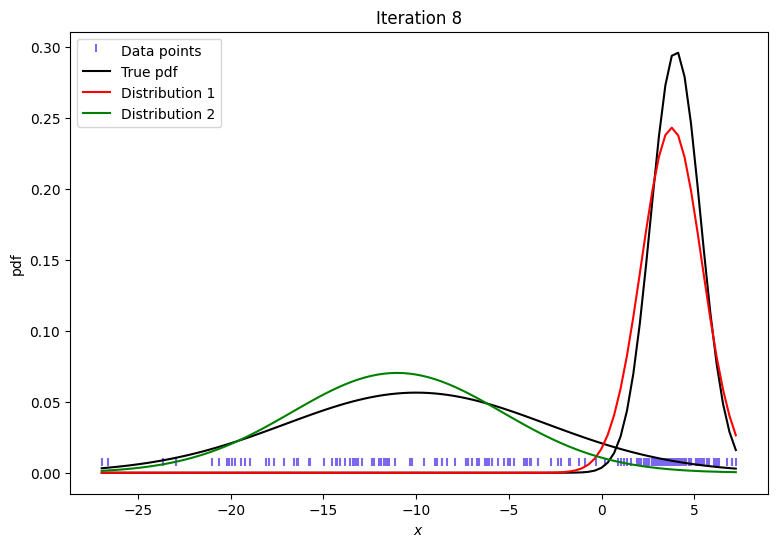

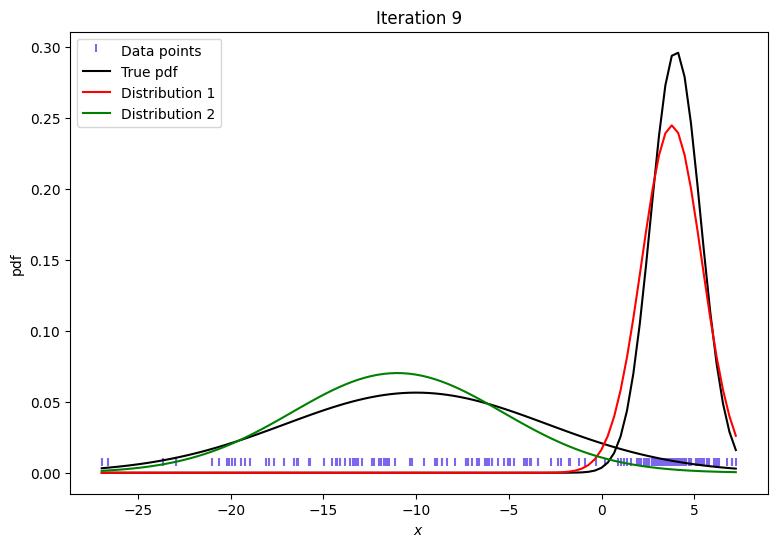

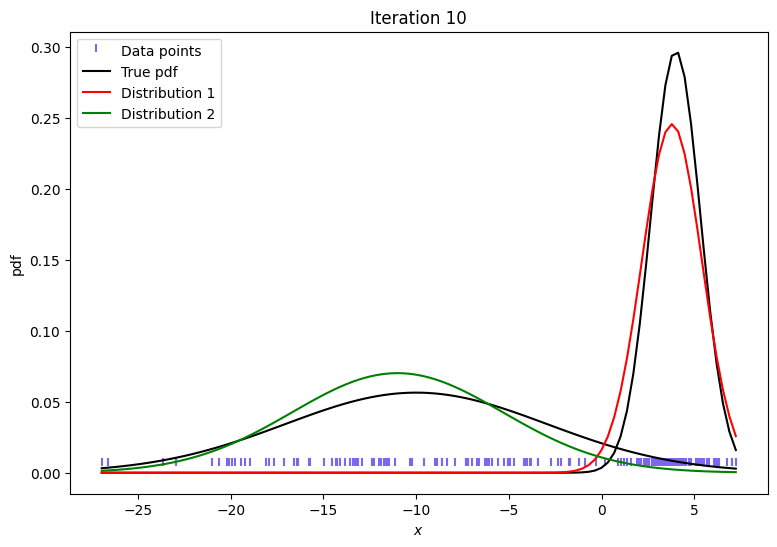

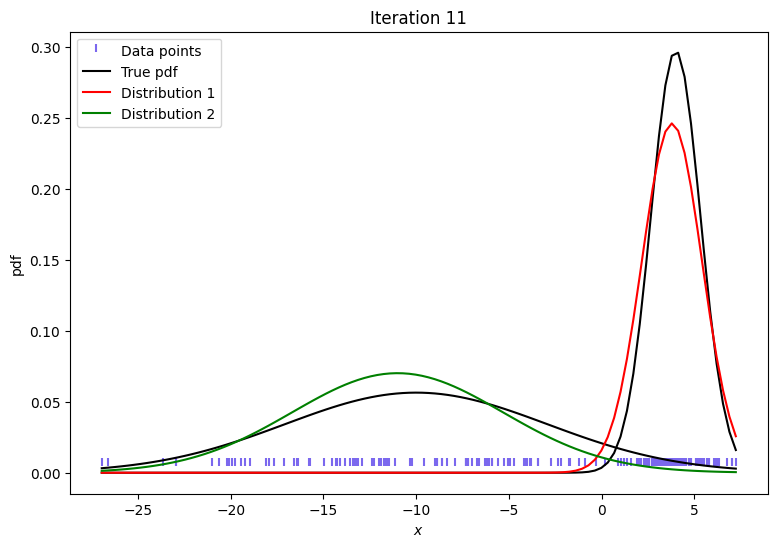

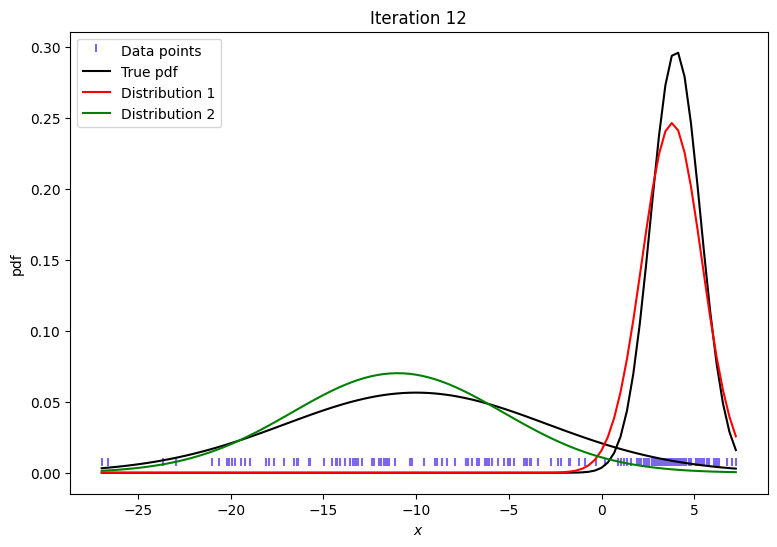

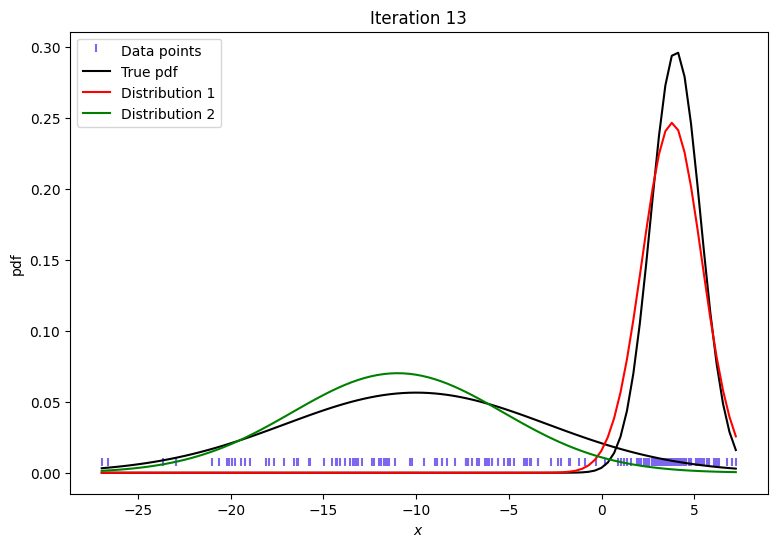

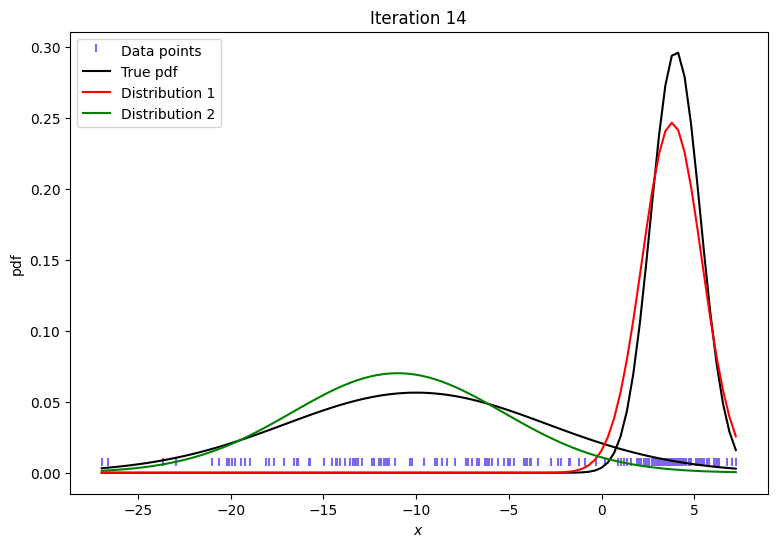

In [6]:
epsilon=1e-9
for step in range(15): #Range value = the number of iterations
  
  if step % 1 == 0:
    plt.figure(figsize=(9,6))
    axes = plt.gca()
    plt.xlabel("$x$")
    plt.ylabel("pdf")
    plt.title("Iteration {}".format(step))
    plt.scatter(X, [0.005] * len(X), color='mediumslateblue', s=30, marker=2, label="Data points")

    #Plot the true pdf
    plt.plot(bin, pdf(bin, mu1, sig1), color='black', label="True pdf")
    plt.plot(bin, pdf(bin, mu2, sig2), color='black')

    #Plot the estimated pdf
    plt.plot(bin, pdf(bin, means[0], variances[0]), color='red', label="Distribution 1")
    plt.plot(bin, pdf(bin, means[1], variances[1]), color='green', label="Distribution 2")
    
    plt.legend(loc='upper left')
    
    #Save the plots
    #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
    plt.show()
  
  #Maximum likelihood of each x_i
  likelh = []
  
  """
  E-step
  """
  for j in range(k):
    likelh.append(pdf(X, means[j], np.sqrt(variances[j])))
  likelh = np.array(likelh)
    
  """ 
  M-step 
  """
  l = []
  for j in range(k):
    #Calculate the probabilities of each data to belong from either gaussian  
    l.append((likelh[j] * weights[j]) / (np.sum([likelh[i] * weights[i] for i in range(k)], axis=0)+epsilon))
  
    #Update the parameters
    means[j] = np.sum(l[j] * X) / (np.sum(l[j]+epsilon))
    variances[j] = np.sum(l[j] * np.square(X - means[j])) / (np.sum(l[j]+epsilon))
    weights[j] = np.mean(l[j])

In [7]:
# convert images into gif. Note: takes a long time to do
#!sudo apt-get install ffmpeg imagemagick
!convert -delay 50 -loop 0 *.png out_.gif

zsh:1: no matches found: *.png
